In [1]:
import numpy as np
import pandas as pd
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import tensorflow as tf


In [2]:
dataset=pd.read_csv("/content/sample_data/AIR (1).csv", index_col=0)
dataset

,pm25,pm10,no2,o3,so2,co,temp,rhum,wspd,pres,coco,pm25_AQI,pm10_AQI,no2_AQI,o3_AQI,so2_AQI,overall_AQI
data-time,,,,,,,,,,,,,,,,,
2020-05-10 5:00,58.034210,110.055560,13.585500,52.262104,11.142777,771.05260,34.3,53,14.8,1006.3,2,5,5,1,2,1,5
2020-05-10 6:00,58.122580,119.764640,13.946207,46.129310,12.405385,776.62415,36.4,47,11.2,1006.5,2,5,5,1,1,1,5
2020-05-10 7:00,58.029293,117.268555,13.009876,50.262165,11.643125,744.78455,36.3,46,13.0,1006.1,2,5,5,1,1,1,5
2020-05-10 8:00,57.566273,120.596770,13.470699,56.497150,12.205358,787.17240,37.1,43,11.1,1005.6,2,5,5,1,2,1,5
2020-05-10 9:00,52.736923,117.967780,10.979615,43.265000,9.713333,882.08330,27.2,66,13.0,1008.3,2,5,5,1,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01 20:00,58.000000,97.247260,21.684875,19.913027,10.997194,1034.19400,29.0,91,0.0,1007.7,2,5,4,1,1,1,5
2021-10-01 21:00,58.000000,96.377594,21.543179,19.888464,11.030029,1027.37370,29.0,94,0.0,1008.6,2,5,4,1,1,1,5
2021-10-01 22:00,50.000000,95.480870,21.432848,19.918104,11.053946,1023.47595,28.9,91,1.8,1007.6,2,4,4,1,1,1,4


In [3]:
# split data
from sklearn.model_selection import train_test_split

features=dataset.values
targets=dataset[["pm25", "pm10", "no2", "o3", "so2"]].values

X_train, X_test, y_train, y_test  = train_test_split(features, targets, test_size=0.1, random_state=1, shuffle=False)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.1, random_state=1, shuffle=False)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X_train: (9910, 17)
X_test: (1224, 17)


In [4]:
# normalize 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_val = scaler.transform(X_val)

X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((9910, 17), (1224, 17))

In [5]:
#Setup timeseries generator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

win_length=12
batch_size=4
num_features=features.shape[1]

train_generator = TimeseriesGenerator(X_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
val_generator = TimeseriesGenerator(X_val, y_val, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(X_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

train_generator[0]


(array([[[0.56365065, 0.2729785 , 0.03717567, 0.13531226, 0.0250287 ,
          0.97324538, 0.70657277, 0.46590909, 0.12111293, 0.50147493,
          0.04166667, 0.8       , 0.8       , 0.        , 0.2       ,
          0.        , 0.8       ],
         [0.56369777, 0.27946918, 0.03774063, 0.1326113 , 0.02786475,
          0.97326491, 0.75586854, 0.39772727, 0.09165303, 0.50737463,
          0.04166667, 0.8       , 0.8       , 0.        , 0.        ,
          0.        , 0.8       ],
         [0.56364803, 0.27780051, 0.0362741 , 0.13443146, 0.02615257,
          0.97315325, 0.75352113, 0.38636364, 0.10638298, 0.49557522,
          0.04166667, 0.8       , 0.8       , 0.        , 0.        ,
          0.        , 0.8       ],
         [0.56340113, 0.28002548, 0.03699586, 0.13717743, 0.02741545,
          0.97330191, 0.77230047, 0.35227273, 0.0908347 , 0.48082596,
          0.04166667, 0.8       , 0.8       , 0.        , 0.2       ,
          0.        , 0.8       ],
         [0.56082593

#LSTM

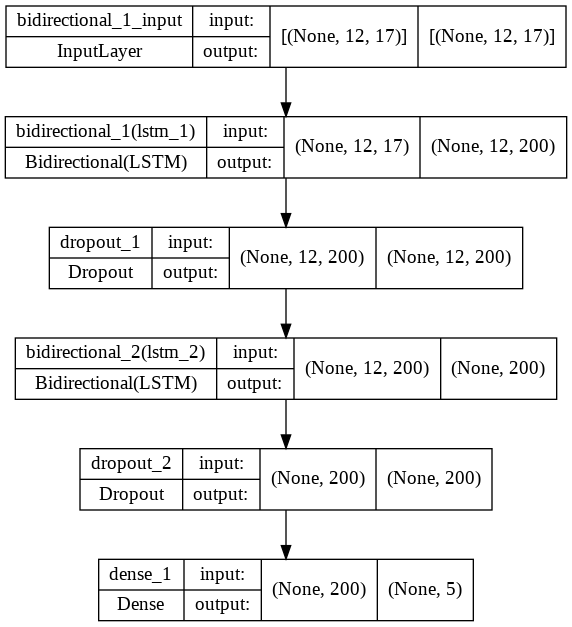

In [11]:
model_LSTM = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100,  return_sequences=True), input_shape=(win_length, num_features)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=False)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(targets.shape[1])
])

model_LSTM.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),loss=tf.losses.MeanSquaredLogarithmicError())

tf.keras.utils.plot_model(model=model_LSTM, show_shapes=True)

In [12]:
lr_monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, cooldown=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

with tf.device('/GPU:0'):
    prepared_model = model_LSTM.fit(train_generator, 
                                    validation_data=test_generator,
                                    epochs=200, 
                                    shuffle=False,  
                                    callbacks=[lr_monitor, early_stopping])

Epoch 1/200
2475/2475 [==============================] - 93s 34ms/step - loss: 0.5791 - val_loss: 0.3819 - lr: 0.0010
Epoch 2/200
2475/2475 [==============================] - 79s 32ms/step - loss: 0.3605 - val_loss: 0.4365 - lr: 0.0010
Epoch 3/200
2475/2475 [==============================] - 78s 31ms/step - loss: 0.3242 - val_loss: 0.3388 - lr: 0.0010
Epoch 4/200
2475/2475 [==============================] - 78s 31ms/step - loss: 0.2988 - val_loss: 0.3660 - lr: 0.0010
Epoch 5/200
2475/2475 [==============================] - 80s 32ms/step - loss: 0.2561 - val_loss: 0.2955 - lr: 0.0010
Epoch 6/200
2475/2475 [==============================] - 79s 32ms/step - loss: 0.2349 - val_loss: 0.2308 - lr: 0.0010
Epoch 7/200
2475/2475 [==============================] - 79s 32ms/step - loss: 0.2234 - val_loss: 0.2138 - lr: 0.0010
Epoch 8/200
2475/2475 [==============================] - 79s 32ms/step - loss: 0.2103 - val_loss: 0.1994 - lr: 0.0010
Epoch 9/200
2475/2475 [==============================] -

Text(0, 0.5, 'mse score')

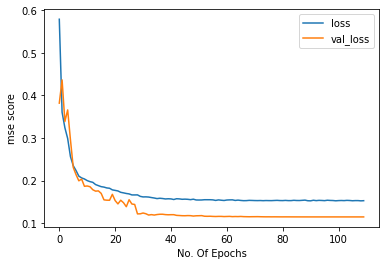

In [13]:
plt.plot(prepared_model.history["loss"],label="loss")
plt.plot(prepared_model.history["val_loss"],label="val_loss")
plt.legend(loc="best")
plt.xlabel("No. Of Epochs")
plt.ylabel("mse score")

In [14]:
model_LSTM.evaluate(test_generator, verbose=1)

303/303 [==============================] - 3s 9ms/step - loss: 0.1145


0.11447479575872421

In [15]:
predictions=model_LSTM.predict(test_generator)

pd.DataFrame(predictions)

,0,1,2,3,4
0,22.637388,51.488289,16.310591,29.939810,9.807959
1,22.352365,51.252529,16.352573,30.028131,9.829998
2,22.205769,50.922352,16.457521,29.743519,9.881522
3,22.144564,50.754253,16.641226,29.177610,9.987692
4,15.491926,44.658260,16.133755,32.275490,9.981472
...,...,...,...,...,...
1207,34.635361,70.121727,23.133209,20.809561,11.314754
1208,48.340553,88.144814,24.504768,21.981022,11.716608
1209,49.872299,86.966133,24.381264,19.999065,11.543457
1210,39.082832,73.408150,23.139118,18.270174,11.066623


In [16]:
df_pred=pd.DataFrame(X_test[:,:][win_length:])

rev_trans=scaler.inverse_transform(df_pred)

df_final=dataset[rev_trans.shape[0]*-1:]

df_final[["pm25_pred", "pm10_pred", "no2_pred", "o3_pred", "so2_pred"]]=predictions
df_final

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,pm25,pm10,no2,o3,so2,co,temp,rhum,wspd,pres,...,pm10_AQI,no2_AQI,o3_AQI,so2_AQI,overall_AQI,pm25_pred,pm10_pred,no2_pred,o3_pred,so2_pred
data-time,,,,,,,,,,,,,,,,,,,,,
2021-08-12 13:00,22.936932,24.773973,17.878206,27.673174,9.682981,860.35200,35.6,57,5.5,1000.4,...,2,1,1,1,3,22.637388,51.488289,16.310591,29.939810,9.807959
2021-08-12 14:00,22.775126,24.278646,17.855543,27.739470,9.688558,859.93740,34.9,60,3.7,1000.8,...,2,1,1,1,3,22.352365,51.252529,16.352573,30.028131,9.829998
2021-08-12 15:00,21.930166,23.018396,17.832579,27.807625,9.694173,859.50543,33.8,68,0.0,1001.3,...,2,1,1,1,3,22.205769,50.922352,16.457521,29.743519,9.881522
2021-08-12 16:00,20.642754,22.154228,17.809309,27.877730,9.699825,859.05493,33.3,70,0.0,1001.6,...,2,1,1,1,2,22.144564,50.754253,16.641226,29.177610,9.987692
2021-08-12 17:00,19.504057,21.790426,17.785725,27.949884,9.705510,858.58453,32.8,73,1.8,1002.0,...,2,1,1,1,2,15.491926,44.658260,16.133755,32.275490,9.981472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01 20:00,58.000000,97.247260,21.684875,19.913027,10.997194,1034.19400,29.0,91,0.0,1007.7,...,4,1,1,1,5,34.635361,70.121727,23.133209,20.809561,11.314754
2021-10-01 21:00,58.000000,96.377594,21.543179,19.888464,11.030029,1027.37370,29.0,94,0.0,1008.6,...,4,1,1,1,5,48.340553,88.144814,24.504768,21.981022,11.716608
2021-10-01 22:00,50.000000,95.480870,21.432848,19.918104,11.053946,1023.47595,28.9,91,1.8,1007.6,...,4,1,1,1,4,49.872299,86.966133,24.381264,19.999065,11.543457


#CNN

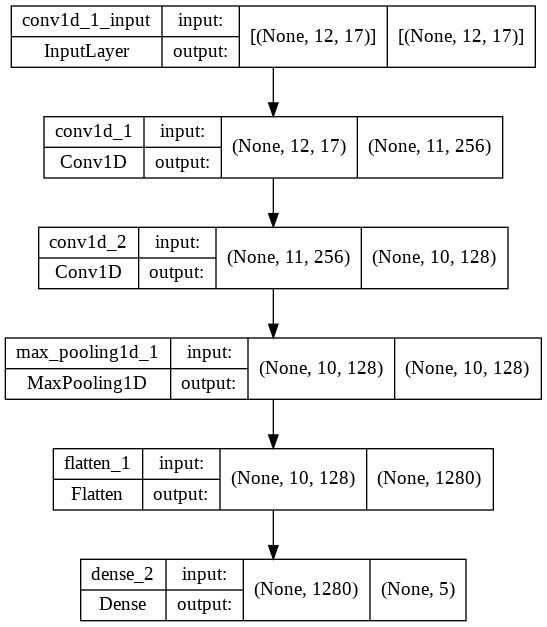

In [17]:
model_CNN = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=256, kernel_size=2, activation=tf.keras.layers.LeakyReLU(alpha=0.3), input_shape=(win_length, num_features)),
    tf.keras.layers.Conv1D(filters=128, kernel_size=2, activation=tf.keras.layers.LeakyReLU(alpha=0.3)),
    tf.keras.layers.MaxPooling1D(pool_size=1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(targets.shape[1])
])

model_CNN.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),loss=tf.losses.MeanSquaredLogarithmicError())

tf.keras.utils.plot_model(model=model_CNN, show_shapes=True)

In [18]:
lr_monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, cooldown=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

with tf.device('/GPU:0'):
    prepared_model_CNN = model_CNN.fit(train_generator, 
                                       validation_data=test_generator,
                                       epochs=400, 
                                       shuffle=False,  
                                       callbacks=[lr_monitor, early_stopping])

Epoch 1/400
2475/2475 [==============================] - 12s 4ms/step - loss: 2.5804 - val_loss: 2.3498 - lr: 0.0010
Epoch 2/400
2475/2475 [==============================] - 10s 4ms/step - loss: 2.5387 - val_loss: 2.3595 - lr: 0.0010
Epoch 3/400
2475/2475 [==============================] - 15s 6ms/step - loss: 0.9472 - val_loss: 0.2906 - lr: 0.0010
Epoch 4/400
2475/2475 [==============================] - 12s 5ms/step - loss: 0.1772 - val_loss: 0.2694 - lr: 0.0010
Epoch 5/400
2475/2475 [==============================] - 14s 6ms/step - loss: 0.1712 - val_loss: 0.2451 - lr: 0.0010
Epoch 6/400
2475/2475 [==============================] - 11s 5ms/step - loss: 0.1711 - val_loss: 0.2401 - lr: 0.0010
Epoch 7/400
2475/2475 [==============================] - 10s 4ms/step - loss: 0.1674 - val_loss: 0.2299 - lr: 0.0010
Epoch 8/400
2475/2475 [==============================] - 11s 4ms/step - loss: 0.1710 - val_loss: 0.2067 - lr: 0.0010
Epoch 9/400
2475/2475 [==============================] - 11s 4ms

Text(0, 0.5, 'mse score')

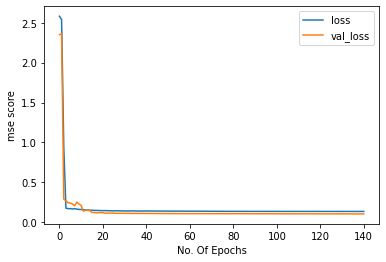

In [19]:
plt.plot(prepared_model_CNN.history["loss"],label="loss")
plt.plot(prepared_model_CNN.history["val_loss"],label="val_loss")
plt.legend(loc="best")
plt.xlabel("No. Of Epochs")
plt.ylabel("mse score")

In [20]:
model_CNN.evaluate(test_generator, verbose=1)

303/303 [==============================] - 1s 2ms/step - loss: 0.1053


0.10528261959552765

In [21]:
#GET PREDICTIONS
predictions=model_CNN.predict(test_generator)

pd.DataFrame(predictions)

,0,1,2,3,4
0,21.785887,42.089649,13.684621,34.861340,8.734796
1,20.574558,37.744957,14.774793,34.459942,8.217484
2,20.568882,39.169006,15.762281,32.487442,8.620313
3,23.115910,43.005623,15.908993,32.097500,8.267347
4,18.415026,35.967331,19.318125,31.478916,7.845410
...,...,...,...,...,...
1207,38.869080,82.996986,25.735989,21.136263,9.126002
1208,47.052547,88.991386,26.167826,19.051224,8.594151
1209,49.394318,94.121712,26.435604,19.593555,8.887876
1210,45.221817,82.041313,25.369310,18.783840,9.557208


In [22]:
df_pred=pd.DataFrame(X_test[:,:][win_length:])

rev_trans=scaler.inverse_transform(df_pred)

df_final=dataset[rev_trans.shape[0]*-1:]

df_final[["pm25_pred", "pm10_pred", "no2_pred", "o3_pred", "so2_pred"]]=predictions
df_final

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,pm25,pm10,no2,o3,so2,co,temp,rhum,wspd,pres,...,pm10_AQI,no2_AQI,o3_AQI,so2_AQI,overall_AQI,pm25_pred,pm10_pred,no2_pred,o3_pred,so2_pred
data-time,,,,,,,,,,,,,,,,,,,,,
2021-08-12 13:00,22.936932,24.773973,17.878206,27.673174,9.682981,860.35200,35.6,57,5.5,1000.4,...,2,1,1,1,3,21.785887,42.089649,13.684621,34.861340,8.734796
2021-08-12 14:00,22.775126,24.278646,17.855543,27.739470,9.688558,859.93740,34.9,60,3.7,1000.8,...,2,1,1,1,3,20.574558,37.744957,14.774793,34.459942,8.217484
2021-08-12 15:00,21.930166,23.018396,17.832579,27.807625,9.694173,859.50543,33.8,68,0.0,1001.3,...,2,1,1,1,3,20.568882,39.169006,15.762281,32.487442,8.620313
2021-08-12 16:00,20.642754,22.154228,17.809309,27.877730,9.699825,859.05493,33.3,70,0.0,1001.6,...,2,1,1,1,2,23.115910,43.005623,15.908993,32.097500,8.267347
2021-08-12 17:00,19.504057,21.790426,17.785725,27.949884,9.705510,858.58453,32.8,73,1.8,1002.0,...,2,1,1,1,2,18.415026,35.967331,19.318125,31.478916,7.845410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01 20:00,58.000000,97.247260,21.684875,19.913027,10.997194,1034.19400,29.0,91,0.0,1007.7,...,4,1,1,1,5,38.869080,82.996986,25.735989,21.136263,9.126002
2021-10-01 21:00,58.000000,96.377594,21.543179,19.888464,11.030029,1027.37370,29.0,94,0.0,1008.6,...,4,1,1,1,5,47.052547,88.991386,26.167826,19.051224,8.594151
2021-10-01 22:00,50.000000,95.480870,21.432848,19.918104,11.053946,1023.47595,28.9,91,1.8,1007.6,...,4,1,1,1,4,49.394318,94.121712,26.435604,19.593555,8.887876


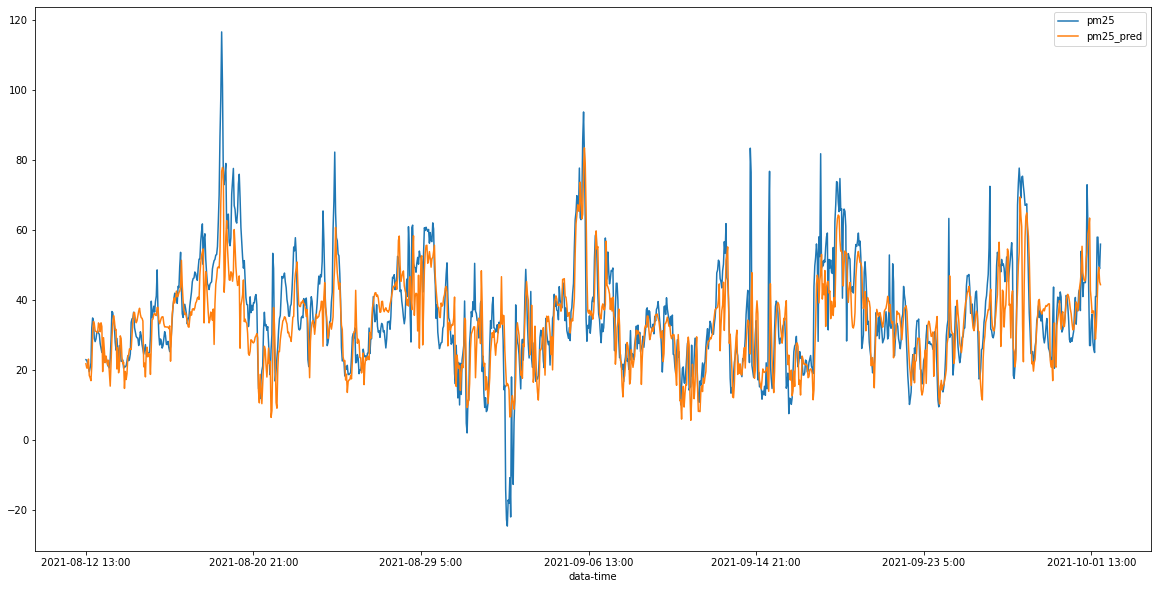

In [23]:
df_final[["pm25","pm25_pred"]].plot(figsize=(20,10))

#CNN-BiLSTM

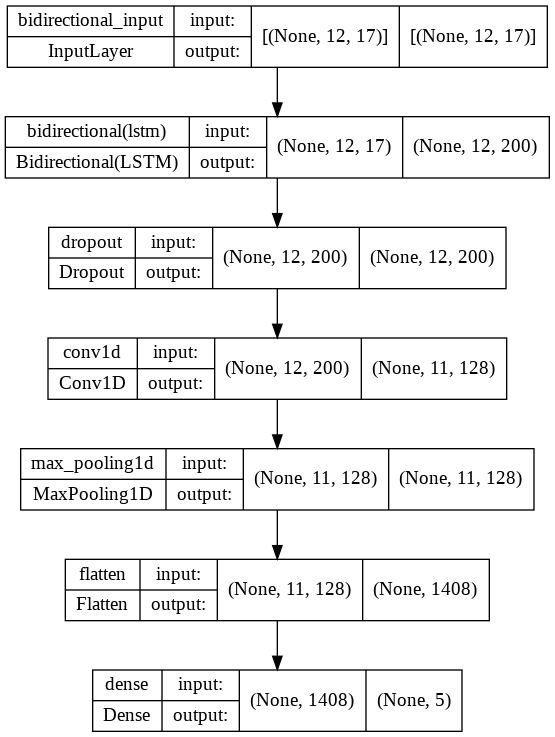

In [6]:
model_LSTMCNN = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True), input_shape=(win_length, num_features)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(filters=128, kernel_size=2, activation=tf.keras.layers.LeakyReLU(alpha=0.7)),
    tf.keras.layers.MaxPooling1D(pool_size=1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(targets.shape[1])
])

model_LSTMCNN.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),loss=tf.losses.MeanSquaredLogarithmicError())

tf.keras.utils.plot_model(model=model_LSTMCNN, show_shapes=True)

In [7]:
lr_monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, cooldown=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

with tf.device('/GPU:0'):
    prepared_model_LSTMCNN = model_LSTMCNN.fit(train_generator, 
                                       validation_data=test_generator,
                                       epochs=200, 
                                       shuffle=False,  
                                       callbacks=[lr_monitor, early_stopping])

Epoch 1/200
2475/2475 [==============================] - 39s 13ms/step - loss: 0.5933 - val_loss: 0.3963 - lr: 0.0010
Epoch 2/200
2475/2475 [==============================] - 33s 13ms/step - loss: 0.2054 - val_loss: 0.3772 - lr: 0.0010
Epoch 3/200
2475/2475 [==============================] - 36s 14ms/step - loss: 0.1878 - val_loss: 0.3230 - lr: 0.0010
Epoch 4/200
2475/2475 [==============================] - 35s 14ms/step - loss: 0.1796 - val_loss: 0.3294 - lr: 0.0010
Epoch 5/200
2475/2475 [==============================] - 36s 14ms/step - loss: 0.1780 - val_loss: 0.2885 - lr: 0.0010
Epoch 6/200
2475/2475 [==============================] - 36s 15ms/step - loss: 0.1793 - val_loss: 0.2439 - lr: 0.0010
Epoch 7/200
2475/2475 [==============================] - 35s 14ms/step - loss: 0.1743 - val_loss: 0.2577 - lr: 0.0010
Epoch 8/200
2475/2475 [==============================] - 35s 14ms/step - loss: 0.1709 - val_loss: 0.2334 - lr: 0.0010
Epoch 9/200
2475/2475 [==============================] -

Text(0, 0.5, 'mse score')

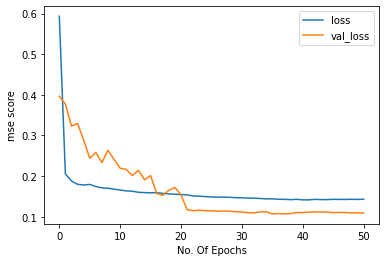

In [24]:
plt.plot(prepared_model_LSTMCNN.history["loss"],label="loss")
plt.plot(prepared_model_LSTMCNN.history["val_loss"],label="val_loss")
plt.legend(loc="best")
plt.xlabel("No. Of Epochs")
plt.ylabel("mse score")

In [25]:
model_LSTMCNN.evaluate(test_generator, verbose=1)

303/303 [==============================] - 1s 4ms/step - loss: 0.1068


0.10683437436819077

In [26]:
predictions=model_CNN.predict(test_generator)

pd.DataFrame(predictions)

,0,1,2,3,4
0,21.785887,42.089649,13.684621,34.861340,8.734796
1,20.574558,37.744957,14.774793,34.459942,8.217484
2,20.568882,39.169006,15.762281,32.487442,8.620313
3,23.115910,43.005623,15.908993,32.097500,8.267347
4,18.415026,35.967331,19.318125,31.478916,7.845410
...,...,...,...,...,...
1207,38.869080,82.996986,25.735989,21.136263,9.126002
1208,47.052547,88.991386,26.167826,19.051224,8.594151
1209,49.394318,94.121712,26.435604,19.593555,8.887876
1210,45.221817,82.041313,25.369310,18.783840,9.557208


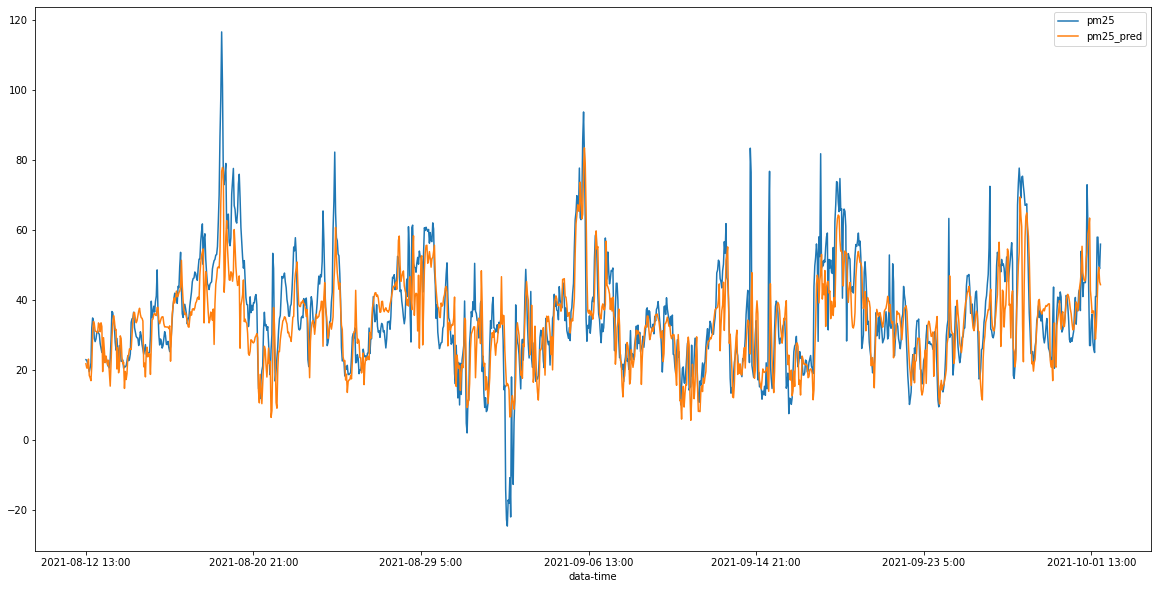

In [27]:
df_final[["pm25","pm25_pred"]].plot(figsize=(20,10))

In [28]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mslr = tf.keras.metrics.mean_squared_logarithmic_error(y_true, y_pred)
  
    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mslr": mslr.numpy(),
           }

In [29]:
selected_features = ["pm25", "pm10", "no2", "o3", "so2"]

for feature in selected_features:
    print("-----{}-----".format(feature))
    print(evaluate_preds(y_true=df_final[feature].values,
                         y_pred=df_final["{}_pred".format(feature)].values)
  
         )
    
    #CNN-BiLSTM

-----pm25-----
{'mae': 7.2922773, 'mse': 103.480705, 'rmse': 10.172546, 'mape': 22.784266, 'mslr': 0.13084537}
-----pm10-----
{'mae': 13.246299, 'mse': 283.66495, 'rmse': 16.842356, 'mape': 27.079731, 'mslr': 0.089438975}
-----no2-----
{'mae': 3.373576, 'mse': 18.778625, 'rmse': 4.3334312, 'mape': 15.836634, 'mslr': 0.036970433}
-----o3-----
{'mae': 7.7064357, 'mse': 350.7584, 'rmse': 18.728544, 'mape': 28.584415, 'mslr': 0.2079086}
-----so2-----
{'mae': 1.9175879, 'mse': 17.678493, 'rmse': 4.20458, 'mape': 18.275791, 'mslr': 0.061249856}
